In [1]:
import cplex
from cplex.exceptions import CplexError
import sys
import pandas as pd
import numpy as np

In [2]:
latlng = ['latitude', 'longitude']
position = pd.read_csv('D:\\Quynh\\Routing_optimization\\vehicle-routing-problem-master\\data\\position.csv', index_col="City")
flighttime = pd.read_csv('D:\\Quynh\\Routing_optimization\\vehicle-routing-problem-master\\data\\flight_time.csv', index_col="City")
distance = pd.read_csv('D:\\Quynh\\Routing_optimization\\vehicle-routing-problem-master\\data\\distance.csv', index_col="City")


In [3]:
position.head(10)

,latitude,longitude
City,,
Barcelona,41.3888,2.1590
Belgrade,44.8040,20.4651
Berlin,52.5244,13.4105
Brussels,50.8505,4.3488
Bucharest,44.4323,26.1063
Budapest,47.4980,19.0399
Copenhagen,55.6759,12.5655
Dublin,53.3331,-6.2489
Hamburg,53.5753,10.0153


In [4]:
flighttime.head(10)

,Barcelona,Belgrade,Berlin,Brussels,Bucharest,Budapest,Copenhagen,Dublin,Hamburg,Istanbul,...,Moscow,Munich,Paris,Prague,Rome,Saint Petersburg,Sofia,Stockholm,Vienna,Warsaw
City,,,,,,,,,,,,,,,,,,,,,
Barcelona,0,379,373,336,416,383,397,372,369,444,...,533,355,315,362,318,502,395,444,370,405
Belgrade,379,0,326,361,274,270,355,433,345,312,...,413,325,372,305,302,407,263,382,286,308
Berlin,373,326,0,291,349,305,261,352,145,395,...,398,190,317,258,345,359,351,303,290,277
Brussels,336,361,291,0,394,347,301,305,273,436,...,459,308,264,299,346,414,388,348,327,337
Bucharest,416,274,349,394,0,295,373,465,369,273,...,388,358,407,332,337,396,254,388,316,313
Budapest,383,270,305,347,295,0,333,418,324,339,...,404,312,361,285,318,390,294,360,268,287
Copenhagen,397,355,261,301,373,333,0,345,252,419,...,392,325,331,289,375,342,379,276,320,289
Dublin,372,433,352,305,465,418,345,0,327,508,...,508,380,310,368,411,452,459,379,399,399
Hamburg,369,345,145,273,369,324,252,327,0,415,...,410,198,303,275,354,364,370,299,308,295


In [5]:
distance.head(10)

,Barcelona,Belgrade,Berlin,Brussels,Bucharest,Budapest,Copenhagen,Dublin,Hamburg,Istanbul,...,Moscow,Munich,Paris,Prague,Rome,Saint Petersburg,Sofia,Stockholm,Vienna,Warsaw
City,,,,,,,,,,,,,,,,,,,,,
Barcelona,0.00,1528.13,1497.61,1062.89,1968.42,1498.79,1757.54,1469.29,1471.78,2230.42,...,3006.93,1054.55,831.59,1353.90,856.69,2813.02,1745.55,2276.51,1347.43,1862.33
Belgrade,1528.13,0.00,999.25,1372.59,447.34,316.41,1327.24,2145.39,1229.93,809.48,...,1710.99,773.33,1445.70,738.10,721.55,1797.75,329.46,1620.96,489.28,826.66
Berlin,1497.61,999.25,0.00,651.62,1293.40,689.06,354.03,1315.16,254.51,1735.01,...,1607.99,501.97,876.96,280.34,1181.67,1319.62,1318.67,810.38,523.61,516.06
Brussels,1062.89,1372.59,651.62,0.00,1769.69,1131.52,766.67,773.20,489.76,2178.85,...,2253.26,601.87,261.29,721.08,1171.34,1903.66,1697.83,1280.88,914.81,1159.85
Bucharest,1968.42,447.34,1293.40,1769.69,0.00,639.77,1571.54,2534.72,1544.17,445.62,...,1497.56,1186.37,1869.95,1076.82,1137.38,1740.39,296.68,1742.25,855.32,946.12
Budapest,1498.79,316.41,689.06,1131.52,639.77,0.00,1011.31,1894.95,927.92,1064.76,...,1565.19,563.93,1247.61,443.26,811.11,1556.51,629.63,1316.59,216.98,545.29
Copenhagen,1757.54,1327.24,354.03,766.67,1571.54,1011.31,0.00,1238.38,287.97,2017.17,...,1558.52,838.00,1025.90,633.05,1529.69,1143.40,1635.54,521.68,868.87,667.80
Dublin,1469.29,2145.39,1315.16,773.20,2534.72,1894.95,1238.38,0.00,1073.36,2950.11,...,2792.41,1374.91,776.83,1465.61,1882.22,2314.19,2471.02,1626.56,1680.00,1823.72
Hamburg,1471.78,1229.93,254.51,489.76,1544.17,927.92,287.97,1073.36,0.00,1983.75,...,1779.93,610.17,744.63,492.25,1307.51,1414.16,1554.82,809.65,742.79,750.49


In [6]:
sites = list(position.index)
sites = sites[0:10]
print(sites)

['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul']


In [7]:
#make some positions (so we can plot this)
positions = dict( ( city, (position.loc[city, 'longitude'], position.loc[city, 'latitude']) ) for city in sites)
print(positions)

{'Barcelona': (2.1590000000000003, 41.3888), 'Belgrade': (20.4651, 44.803999999999995), 'Berlin': (13.4105, 52.5244), 'Brussels': (4.3488, 50.8505), 'Bucharest': (26.1063, 44.4323), 'Budapest': (19.0399, 47.498000000000005), 'Copenhagen': (12.5655, 55.6759), 'Dublin': (-6.2489, 53.3331), 'Hamburg': (10.0153, 53.5753), 'Istanbul': (28.9497, 41.0138)}


(-8.00883, 30.70963, 40.280695, 56.409005)

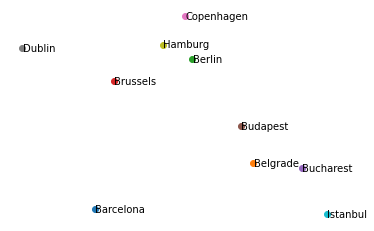

In [8]:
import matplotlib.pyplot as plt
for s in positions:
    p = positions[s]
    plt.plot(p[0],p[1],'o')
    plt.text(p[0]+.01,p[1],s,horizontalalignment='left',verticalalignment='center')
    
plt.gca().axis('off')

In [9]:
# get distance between cities
distances = dict( ((s1,s2), distance.loc[s1, s2] ) for s1 in positions for s2 in positions if s1!=s2)
print(distances)

{('Barcelona', 'Belgrade'): 1528.13, ('Barcelona', 'Berlin'): 1497.61, ('Barcelona', 'Brussels'): 1062.89, ('Barcelona', 'Bucharest'): 1968.42, ('Barcelona', 'Budapest'): 1498.79, ('Barcelona', 'Copenhagen'): 1757.54, ('Barcelona', 'Dublin'): 1469.29, ('Barcelona', 'Hamburg'): 1471.78, ('Barcelona', 'Istanbul'): 2230.42, ('Belgrade', 'Barcelona'): 1528.13, ('Belgrade', 'Berlin'): 999.25, ('Belgrade', 'Brussels'): 1372.59, ('Belgrade', 'Bucharest'): 447.34, ('Belgrade', 'Budapest'): 316.41, ('Belgrade', 'Copenhagen'): 1327.24, ('Belgrade', 'Dublin'): 2145.39, ('Belgrade', 'Hamburg'): 1229.93, ('Belgrade', 'Istanbul'): 809.48, ('Berlin', 'Barcelona'): 1497.61, ('Berlin', 'Belgrade'): 999.25, ('Berlin', 'Brussels'): 651.62, ('Berlin', 'Bucharest'): 1293.4, ('Berlin', 'Budapest'): 689.06, ('Berlin', 'Copenhagen'): 354.03, ('Berlin', 'Dublin'): 1315.16, ('Berlin', 'Hamburg'): 254.51, ('Berlin', 'Istanbul'): 1735.01, ('Brussels', 'Barcelona'): 1062.89, ('Brussels', 'Belgrade'): 1372.59, ('Br

In [10]:
K=3
try:
    myProblem= cplex.Cplex()  
    myProblem.objective.set_sense(myProblem.objective.sense.minimize)
except CplexError:
    print ("exc")
 

In [11]:
# set name variables
x = ["x_" + str(i) +'_'+ str(j) for i in sites for j in sites if i!=j]
print((x))
u = ["u_" + str(i) for i in sites]
# print(u)

['x_Barcelona_Belgrade', 'x_Barcelona_Berlin', 'x_Barcelona_Brussels', 'x_Barcelona_Bucharest', 'x_Barcelona_Budapest', 'x_Barcelona_Copenhagen', 'x_Barcelona_Dublin', 'x_Barcelona_Hamburg', 'x_Barcelona_Istanbul', 'x_Belgrade_Barcelona', 'x_Belgrade_Berlin', 'x_Belgrade_Brussels', 'x_Belgrade_Bucharest', 'x_Belgrade_Budapest', 'x_Belgrade_Copenhagen', 'x_Belgrade_Dublin', 'x_Belgrade_Hamburg', 'x_Belgrade_Istanbul', 'x_Berlin_Barcelona', 'x_Berlin_Belgrade', 'x_Berlin_Brussels', 'x_Berlin_Bucharest', 'x_Berlin_Budapest', 'x_Berlin_Copenhagen', 'x_Berlin_Dublin', 'x_Berlin_Hamburg', 'x_Berlin_Istanbul', 'x_Brussels_Barcelona', 'x_Brussels_Belgrade', 'x_Brussels_Berlin', 'x_Brussels_Bucharest', 'x_Brussels_Budapest', 'x_Brussels_Copenhagen', 'x_Brussels_Dublin', 'x_Brussels_Hamburg', 'x_Brussels_Istanbul', 'x_Bucharest_Barcelona', 'x_Bucharest_Belgrade', 'x_Bucharest_Berlin', 'x_Bucharest_Brussels', 'x_Bucharest_Budapest', 'x_Bucharest_Copenhagen', 'x_Bucharest_Dublin', 'x_Bucharest_Ham

In [12]:
# set obj variables
obj = [distances[(i,j)] for (i,j) in distances]
print(obj)

[1528.13, 1497.61, 1062.89, 1968.42, 1498.79, 1757.54, 1469.29, 1471.78, 2230.42, 1528.13, 999.25, 1372.59, 447.34, 316.41, 1327.24, 2145.39, 1229.93, 809.48, 1497.61, 999.25, 651.62, 1293.4, 689.06, 354.03, 1315.16, 254.51, 1735.01, 1062.89, 1372.59, 651.62, 1769.69, 1131.52, 766.67, 773.2, 489.76, 2178.85, 1968.42, 447.34, 1293.4, 1769.69, 639.77, 1571.54, 2534.72, 1544.17, 445.62, 1498.79, 316.41, 689.06, 1131.52, 639.77, 1011.31, 1894.95, 927.92, 1064.76, 1757.54, 1327.24, 354.03, 766.67, 1571.54, 1011.31, 1238.38, 287.97, 2017.17, 1469.29, 2145.39, 1315.16, 773.2, 2534.72, 1894.95, 1238.38, 1073.36, 2950.11, 1471.78, 1229.93, 254.51, 489.76, 1544.17, 927.92, 287.97, 1073.36, 1983.75, 2230.42, 809.48, 1735.01, 2178.85, 445.62, 1064.76, 2017.17, 2950.11, 1983.75]


In [13]:
N=len(sites)/K
#set name x 
myProblem.variables.add(obj = obj,names= x)

range(0, 90)

In [14]:
for i in range(len(obj)):
    myProblem.variables.set_types(i,myProblem.variables.type.binary)

In [15]:
myProblem.variables.add(names= u,types=["I"]*len(u))

range(90, 100)

In [16]:
for i in range(len(u)):
    myProblem.variables.set_upper_bounds(i, len(sites) -1)

In [17]:
myProblem.variables.get_types()

['B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'B',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I',
 'I']

In [18]:
# set constraints
constraints = list()
list_1 = list()
list_2 = list()

for k in sites:
    list_1.append(["x_" + str(i) + '_'+str(k) for i in sites if ("x_"+str(i) + '_'+ str(k)) in x])
    list_2.append(["x_" + str(k) + '_'+str(i) for i in sites if ("x_"+str(k) + '_'+ str(i)) in x])
# print(list_1)
print(list_2)
for i in range(len(list_1)):
    constraints.append([list_1[i],[1]*len(list_1[i])])
    constraints.append([list_2[i],[1]*len(list_2[i])])
    

[['x_Barcelona_Belgrade', 'x_Barcelona_Berlin', 'x_Barcelona_Brussels', 'x_Barcelona_Bucharest', 'x_Barcelona_Budapest', 'x_Barcelona_Copenhagen', 'x_Barcelona_Dublin', 'x_Barcelona_Hamburg', 'x_Barcelona_Istanbul'], ['x_Belgrade_Barcelona', 'x_Belgrade_Berlin', 'x_Belgrade_Brussels', 'x_Belgrade_Bucharest', 'x_Belgrade_Budapest', 'x_Belgrade_Copenhagen', 'x_Belgrade_Dublin', 'x_Belgrade_Hamburg', 'x_Belgrade_Istanbul'], ['x_Berlin_Barcelona', 'x_Berlin_Belgrade', 'x_Berlin_Brussels', 'x_Berlin_Bucharest', 'x_Berlin_Budapest', 'x_Berlin_Copenhagen', 'x_Berlin_Dublin', 'x_Berlin_Hamburg', 'x_Berlin_Istanbul'], ['x_Brussels_Barcelona', 'x_Brussels_Belgrade', 'x_Brussels_Berlin', 'x_Brussels_Bucharest', 'x_Brussels_Budapest', 'x_Brussels_Copenhagen', 'x_Brussels_Dublin', 'x_Brussels_Hamburg', 'x_Brussels_Istanbul'], ['x_Bucharest_Barcelona', 'x_Bucharest_Belgrade', 'x_Bucharest_Berlin', 'x_Bucharest_Brussels', 'x_Bucharest_Budapest', 'x_Bucharest_Copenhagen', 'x_Bucharest_Dublin', 'x_Buch

In [19]:
list_3 = list()

for i in sites:
    for j in sites:
        if i != j and (i != 'Berlin' and j!= 'Berlin') and ("x_"+str(i) + '_'+ str(j)) in x:
            list_3.append("u_"+ str(i))
            list_3.append("u_" + str(j))
            list_3.append("x_"+str(i) + '_'+ str(j))

print(len(list_3))
list_3 = np.array(list_3).reshape(int(len(list_3)/3),3)
print(len(list_3))
for i in range(0,list_3.shape[0]):
    constraints.append([list_3[i],[1,-1,N]])


216
72


In [20]:
print((constraints))

[[['x_Belgrade_Barcelona', 'x_Berlin_Barcelona', 'x_Brussels_Barcelona', 'x_Bucharest_Barcelona', 'x_Budapest_Barcelona', 'x_Copenhagen_Barcelona', 'x_Dublin_Barcelona', 'x_Hamburg_Barcelona', 'x_Istanbul_Barcelona'], [1, 1, 1, 1, 1, 1, 1, 1, 1]], [['x_Barcelona_Belgrade', 'x_Barcelona_Berlin', 'x_Barcelona_Brussels', 'x_Barcelona_Bucharest', 'x_Barcelona_Budapest', 'x_Barcelona_Copenhagen', 'x_Barcelona_Dublin', 'x_Barcelona_Hamburg', 'x_Barcelona_Istanbul'], [1, 1, 1, 1, 1, 1, 1, 1, 1]], [['x_Barcelona_Belgrade', 'x_Berlin_Belgrade', 'x_Brussels_Belgrade', 'x_Bucharest_Belgrade', 'x_Budapest_Belgrade', 'x_Copenhagen_Belgrade', 'x_Dublin_Belgrade', 'x_Hamburg_Belgrade', 'x_Istanbul_Belgrade'], [1, 1, 1, 1, 1, 1, 1, 1, 1]], [['x_Belgrade_Barcelona', 'x_Belgrade_Berlin', 'x_Belgrade_Brussels', 'x_Belgrade_Bucharest', 'x_Belgrade_Budapest', 'x_Belgrade_Copenhagen', 'x_Belgrade_Dublin', 'x_Belgrade_Hamburg', 'x_Belgrade_Istanbul'], [1, 1, 1, 1, 1, 1, 1, 1, 1]], [['x_Barcelona_Berlin', 'x_

In [21]:
my_rhs = list()
for i in list_1:
    if i == ["x_" + str(i) + "_Berlin" for i in sites if i!='Berlin']:
        cap = K    
        my_rhs.append(cap)
    else:
        cap = 1
        my_rhs.append(cap)
for i in list_2:
    if i == ["x_" + "Berlin_"+ str(i)  for i in sites if i!='Berlin']:
        cap = K    
        my_rhs.append(cap)
    else:
        cap = 1
        my_rhs.append(cap)
my_rhs = my_rhs + [N-1]*list_3.shape[0]
print(list_3.shape[0])
my_sense = ["E"]*(len(list_1)+ len(list_2)) + ["L"]*list_3.shape[0]
my_rownames = ["c"+str(i) for i in range(1,len(my_rhs)+1)] 
print((my_rhs ))

72
[1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.3333333333333335, 2.33333333333333

In [22]:
myProblem.linear_constraints.add(lin_expr = constraints, senses = my_sense, rhs = my_rhs, names = my_rownames)
myProblem.solve()
print(myProblem.solution.get_values())
# try:
#     a=myProblem.solution.get_values()
#     b=myProblem.variables.get_names()
#     for i in range(len(a)):
#         if a[i] != 0:
#             print((b[i],a[i]))
# except cplex.exceptions.errors.CplexSolverError:
#     print("No solution")

Version identifier: 20.1.0.0 | 2020-11-11 | 9bedb6d68
CPXPARAM_Read_DataCheck                          1


Tried aggregator 1 time.
MIP Presolve eliminated 0 rows and 1 columns.
MIP Presolve modified 72 coefficients.
Reduced MIP has 92 rows, 99 columns, and 396 nonzeros.
Reduced MIP has 90 binaries, 9 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.21 ticks)
Probing time = 0.00 sec. (0.16 ticks)
Cover probing fixed 0 vars, tightened 2 bounds.
Tried aggregator 1 time.
Detecting symmetries...
Reduced MIP has 92 rows, 99 columns, and 396 nonzeros.
Reduced MIP has 90 binaries, 9 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.00 sec. (0.28 ticks)
Probing time = 0.00 sec. (0.16 ticks)
Clique table members: 54.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.00 sec. (0.15 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

      0     0    infeasible        

CPLEX Error  1217: No solution exists.


CplexSolverError: CPLEX Error  1217: No solution exists.